In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [ ]:
coin_image_path = '/content/drive/MyDrive/coins.jpg'
coin_img = cv2.imread(coin_image_path)
coin_img_g = cv2.cvtColor(coin_img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(coin_img_g, (15, 15), 0)

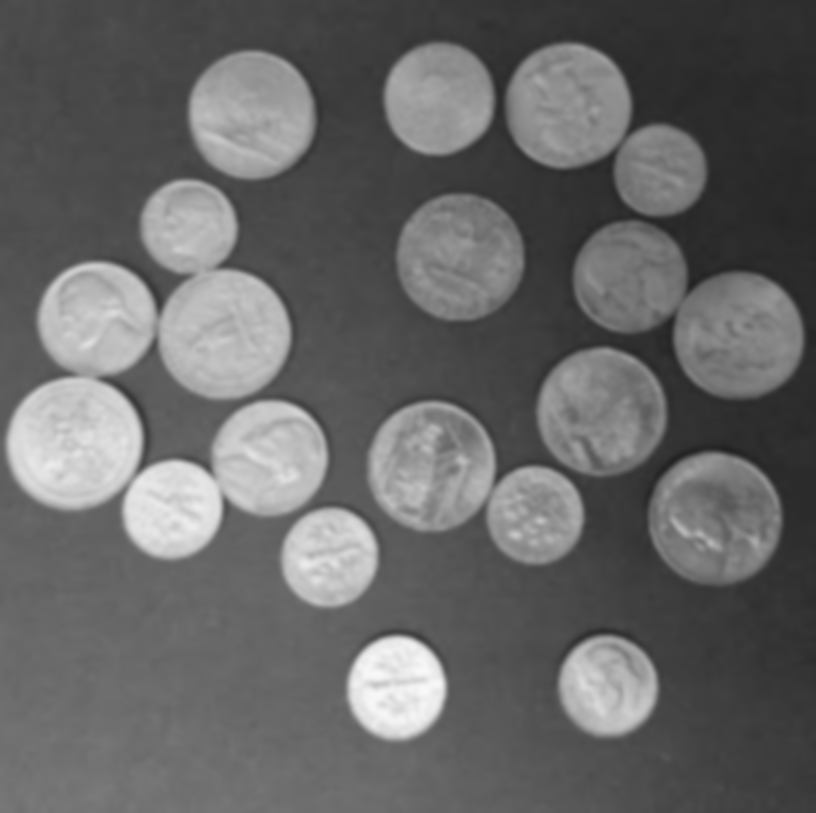

In [ ]:
cv2_imshow(gray_blurred)

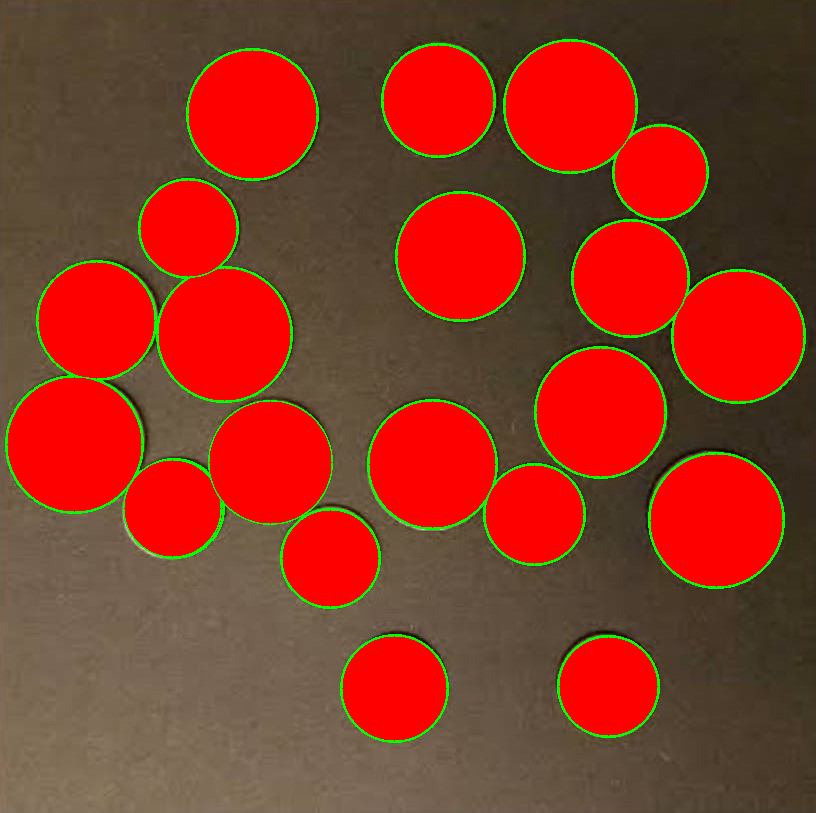

In [ ]:
detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 50,
                                    param1 = 50, param2 = 30, minRadius = 10, maxRadius = 90)
if detected_circles is not None:

    detected_circles = np.round(detected_circles[0, :]).astype("int")

    for (x, y, r) in detected_circles:
        cv2.circle(coin_img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(coin_img, (x, y), r, (0, 0, 255), -1)

    cv2_imshow(coin_img)
    cv2.waitKey(0)

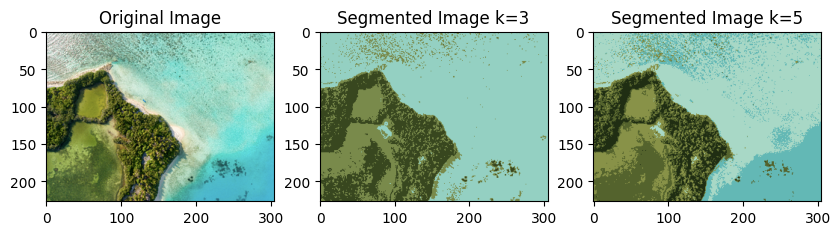

In [ ]:
image = cv2.imread('/content/drive/MyDrive/island.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))

k=5
_, labels1, centers1 = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers1 = np.uint8(centers1)
segmented_data1 = centers1[labels1.flatten()]
segmented_image1 = segmented_data1.reshape((image.shape))

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image k=3')
plt.subplot(1, 3, 3)
plt.imshow(segmented_image1)
plt.title('Segmented Image k=5')

plt.show()